In [ ]:

#Md. Sanim Hossain
#Najnin Sultana Nishu
#Sajib Khan
#Eva Islam


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

cvDataSet = pd.read_csv('/content/UpdatedResumeDataSet.csv' ,encoding='utf-8')
cvDataSet['cleaned_resume'] = ''
cvDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [ ]:
cvDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [ ]:
print ("Showing the distinct types of CV's:\n\n ")
print (cvDataSet['Category'].unique())
category = cvDataSet['Category']

Showing the distinct types of CV's:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [ ]:
print ("Showing the distinct types of CV's and the number of records belonging to each category:\n\n")
print (cvDataSet['Category'].value_counts())

Showing the distinct types of CV's and the number of records belonging to each category:


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


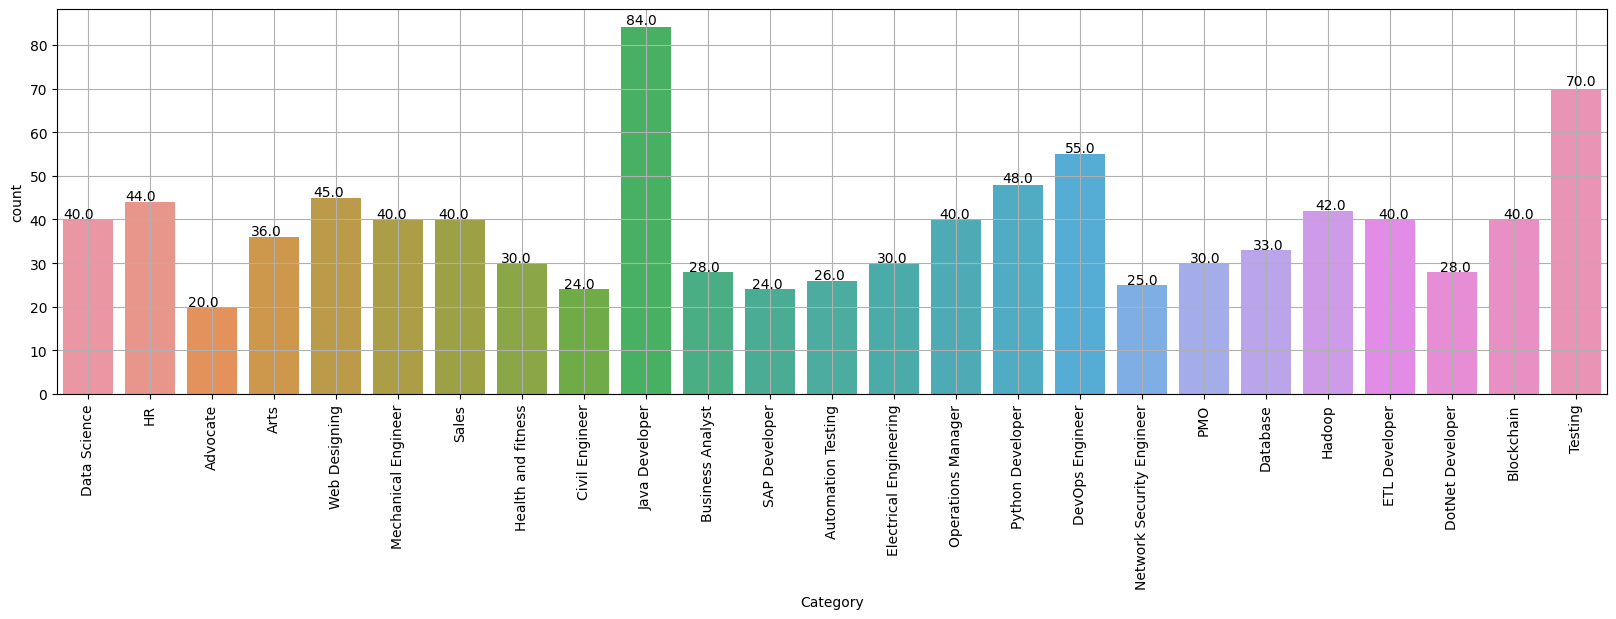

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=cvDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

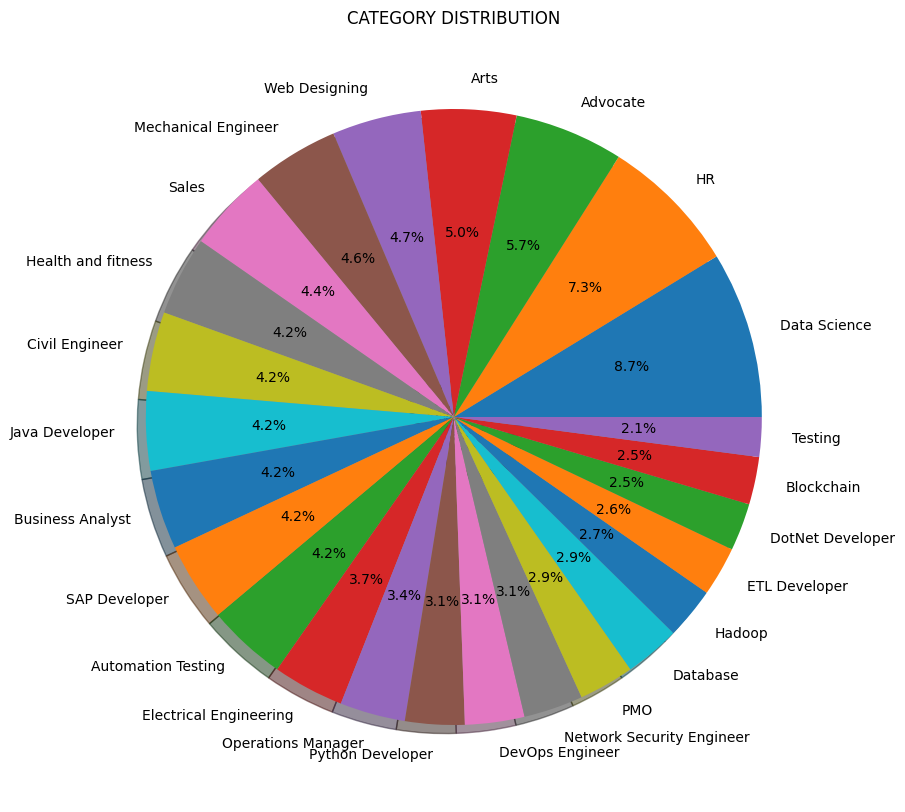

In [ ]:
from matplotlib.gridspec import GridSpec
tCounts = cvDataSet['Category'].value_counts()
tLabels  = cvDataSet['Category'].unique()

plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(tCounts, labels=tLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

cvDataSet['cleaned_resume'] = cvDataSet.Resume.apply(lambda x: cleanResume(x))

In [ ]:
cvDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
resumeDataSet_d=cvDataSet.copy()

In [ ]:
!pip install nltk
import nltk

nltk.download('stopwords')
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords
import string

StopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = cvDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in StopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    cvDataSet[i] = le.fit_transform(cvDataSet[i])


In [ ]:
cvDataSet.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
cvDataSet.Category.value_counts()
tokenizer = {}
for i in range(0, len(category)):
    tokenizer[category[i]] = list(cvDataSet.Category)[i]


In [ ]:
resumeDataSet_d.Category.value_counts() #understanding decode LabelEncoder

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [ ]:
del resumeDataSet_d #clearing the space occupied

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = cvDataSet['cleaned_resume'].values
requiredTarget = cvDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)
my_testing = WordFeatures[0]
print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)


Feature completed .....
(769, 7351)
(193, 7351)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of Decission Tree Classifier on training set: {:.8f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decission Tree Classifier on test set:     {:.8f}'.format(clf.score(X_test, y_test)))


Accuracy of Decission Tree Classifier on training set: 1.00000000
Accuracy of Decission Tree Classifier on test set:     0.99481865


In [ ]:
model_accuracies = {}
for count, value in enumerate(model_list):
    accuracy = model_list[count].score(X_test, y_test)
    model_accuracies[f'{value}'] = accuracy

for model_name, accuracy in model_accuracies.items():
    print(f"Accuracy of {model_name} on test set: {accuracy:.4f}")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set: 0.9793
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set: 0.9948
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on test set: 0.9948
Accuracy of OneVsRestClassifier(estimator=DecisionTreeClassifier()) on test set: 0.9948


In [ ]:
from sklearn.model_selection import cross_val_score

# Define the models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Perform cross-validation and calculate accuracy for each model
for model_name, model in models.items():
    classifier = OneVsRestClassifier(model)
    scores = cross_val_score(classifier, WordFeatures, requiredTarget, cv=5)
    accuracy = scores.mean()
    print(f"Accuracy of {model_name}: {accuracy:.4f}")


Accuracy of K-Nearest Neighbors: 0.9844
Accuracy of Support Vector Machine: 0.9959
Accuracy of Random Forest: 0.9959
Accuracy of Decision Tree: 0.9959


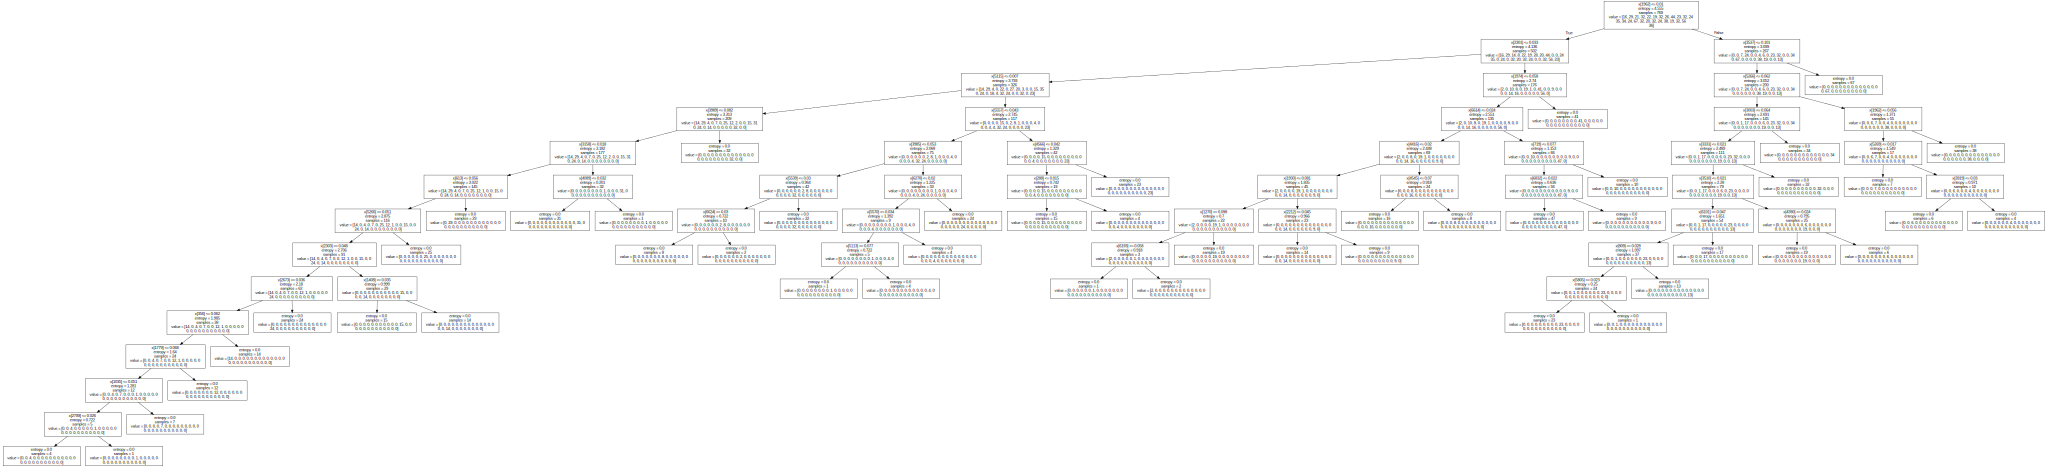

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

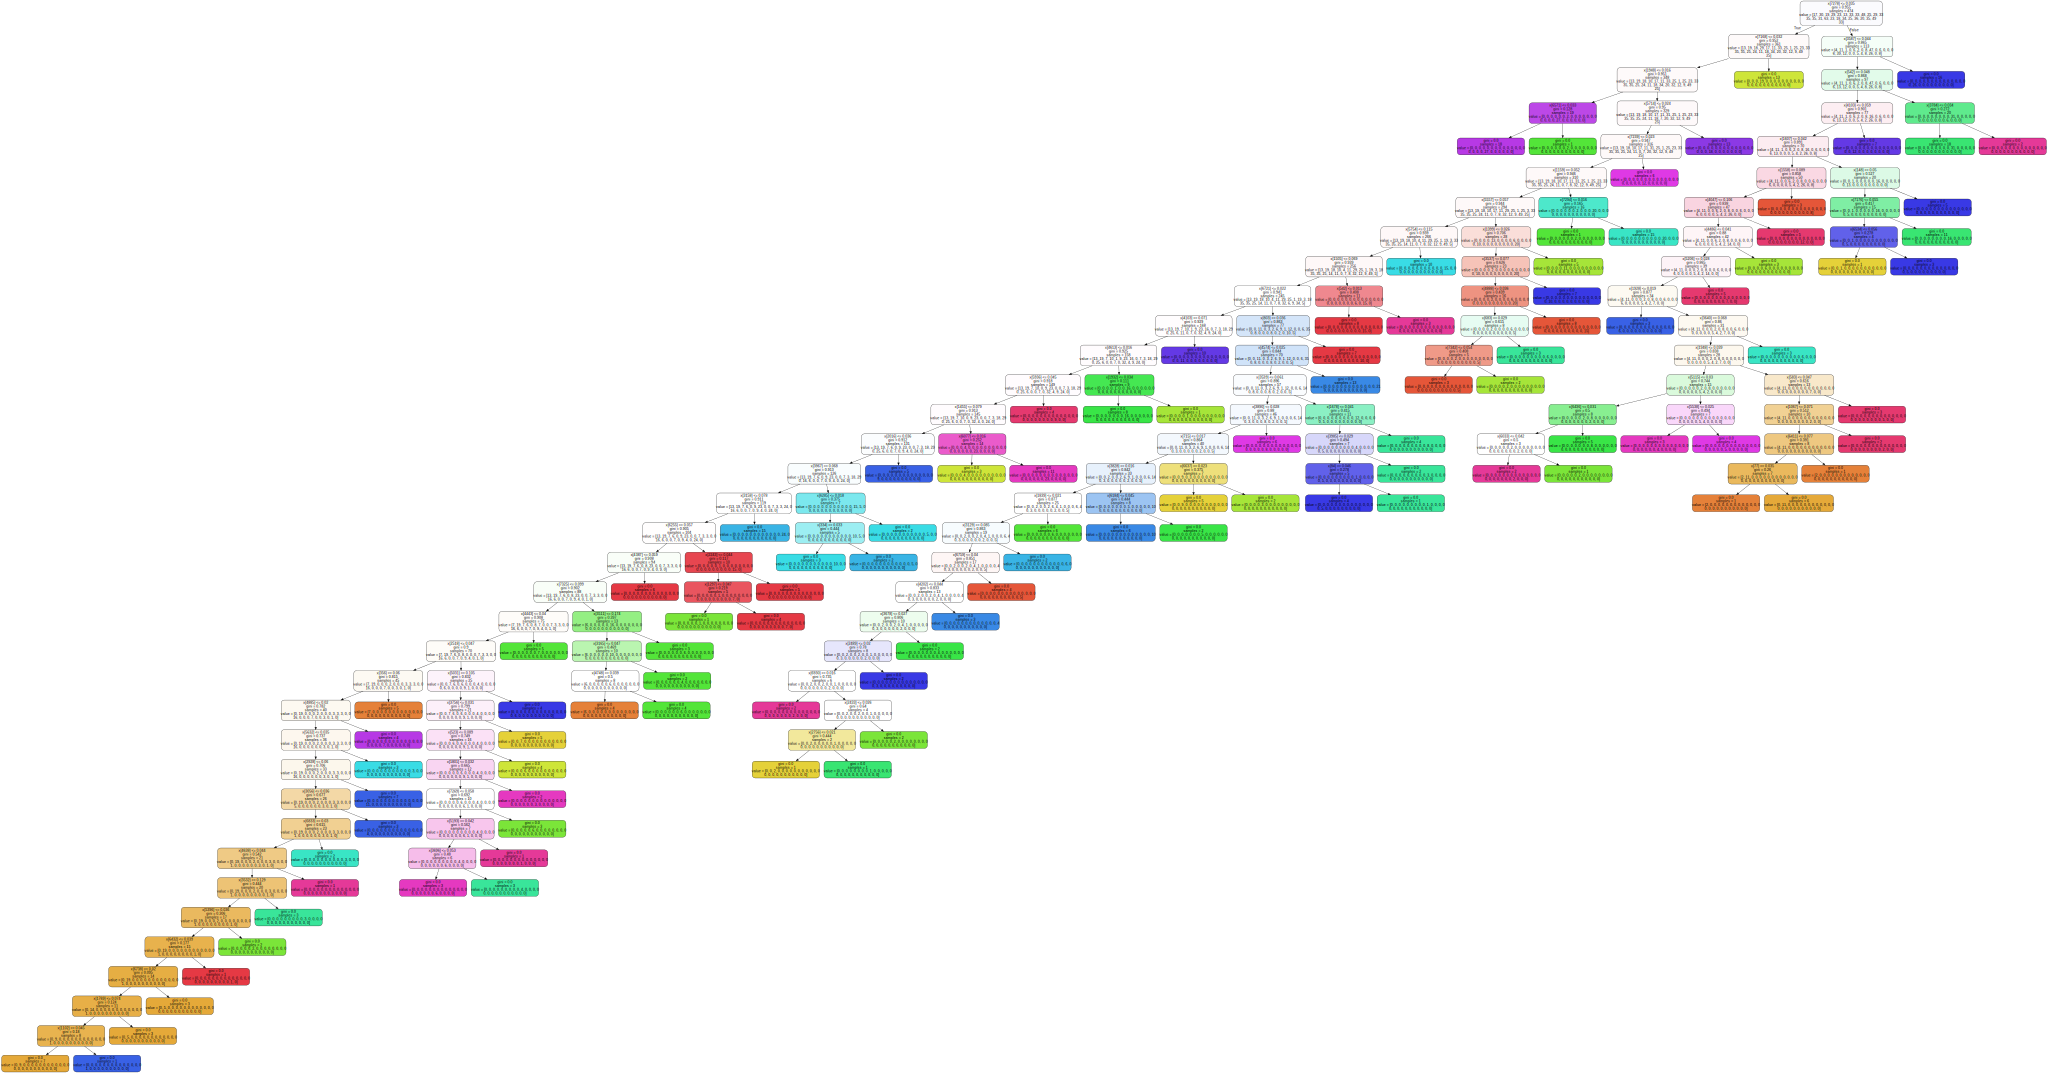

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz

# Create a Random Forest Classifier
rf_clf = RandomForestClassifier()

# Train the model
rf_clf.fit(X_train, y_train)

# Get one of the decision trees from the Random Forest
tree_estimator = rf_clf.estimators_[0]

# Visualize the decision tree using graphviz
dot_data = tree.export_graphviz(tree_estimator, out_file=None, filled=True, rounded=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph
graph




In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {
    'K-NN': KNeighborsClassifier(),
    'SVM': SVC(),
    'RF': RandomForestClassifier(),
    'DT': DecisionTreeClassifier()
}


In [ ]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=RandomForestClassifier()),
 OneVsRestClassifier(estimator=DecisionTreeClassifier())]

In [ ]:
for i in model_list:
    i.fit(X_train, y_train)
    print(f'{i} trained')

print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
OneVsRestClassifier(estimator=DecisionTreeClassifier()) trained
************************************************************
all models trained


In [ ]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(X_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(X_test, y_test))
    print("*"*100)

print("all scores calculated")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.9856957087126138
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.9792746113989638
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.9948186528497409
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on test set : 0.9948186528497409
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=DecisionTreeClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=DecisionTreeClassif

In [ ]:
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report, recall_score,roc_curve, roc_auc_score

from sklearn.model_selection import KFold, cross_val_score, learning_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
for count, value in enumerate(model_list):
    print(f'{value} classification report')
    print("-"*80)
    print(classification_report(y_test, model_list[count].predict(X_test)))
    print("*"*100)
    print(" ")

OneVsRestClassifier(estimator=KNeighborsClassifier()) classification report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.89      1.00      0.94         8
           7       1.00      0.86      0.92         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.0

In [ ]:
results = {}

kf = KFold(n_splits= 10)

for count, value in enumerate(model_list):
    result = cross_val_score(model_list[count], X_train, y_train, scoring= 'accuracy', cv= kf)
    results[value] = result

In [ ]:
print("r2 scores")
print("*********************************")
for name, result in results.items():

    print(f'{name} : {round(np.mean(result),3)}')
    print("----------------")

r2 scores
*********************************
OneVsRestClassifier(estimator=KNeighborsClassifier()) : 0.981
----------------
OneVsRestClassifier(estimator=SVC()) : 0.995
----------------
OneVsRestClassifier(estimator=RandomForestClassifier()) : 0.99
----------------
OneVsRestClassifier(estimator=DecisionTreeClassifier()) : 0.99
----------------


In [ ]:
from sklearn.metrics import confusion_matrix

# Define the models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    classifier = OneVsRestClassifier(model)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print(f'Confusion matrix for {name}:')
    print(cm)
    print('-' * 50)


Confusion matrix for K-Nearest Neighbors:
[[ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  3  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1
   0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  1  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  1  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0
   0

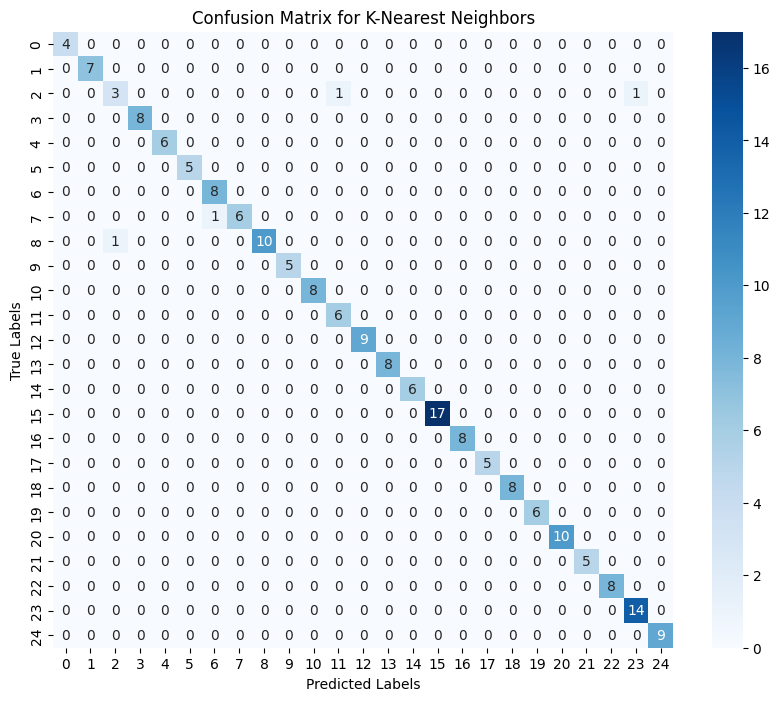

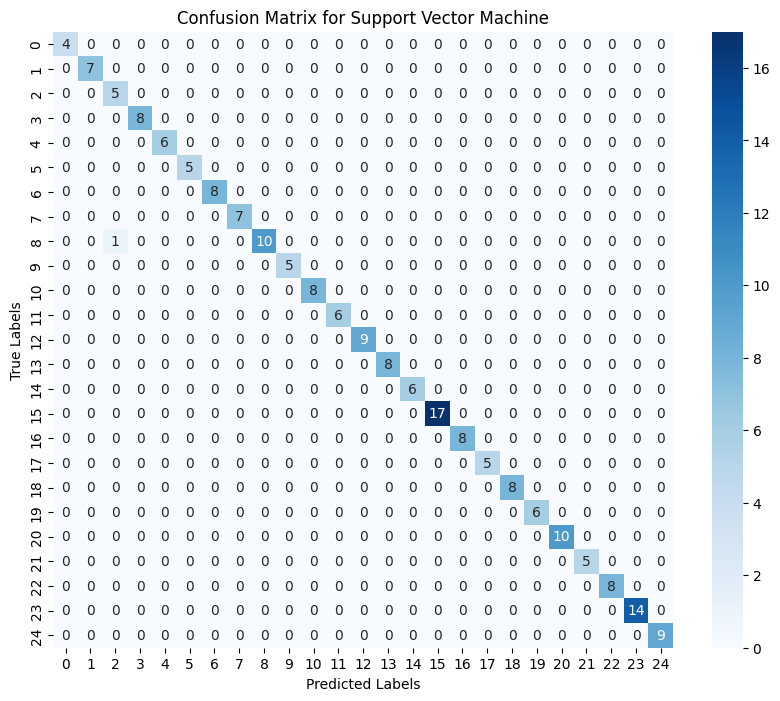

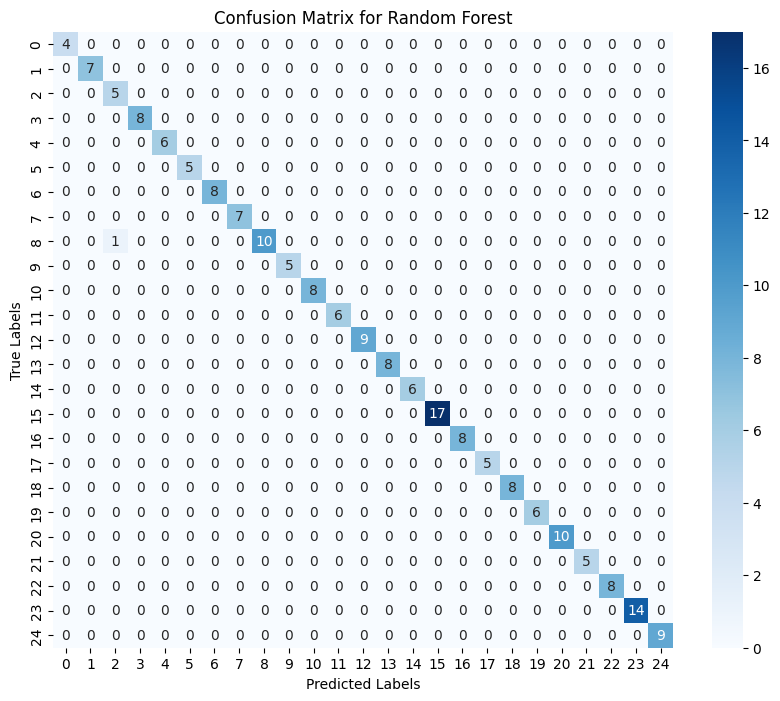

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    classifier = OneVsRestClassifier(model)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


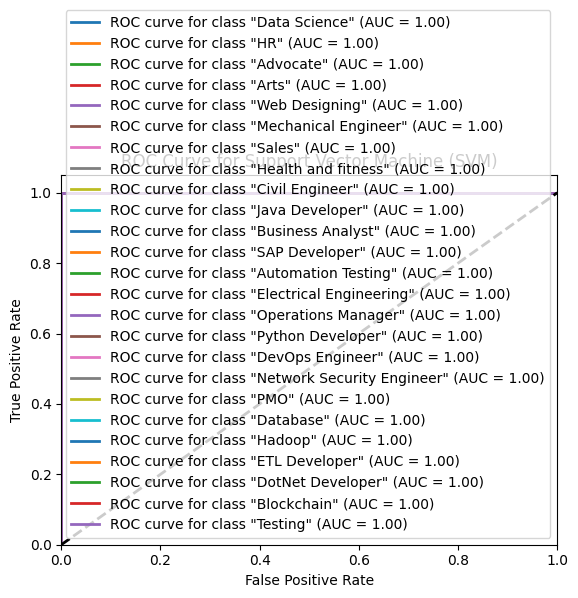

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score

# Train the Support Vector Machine model
svm_model = SVC(probability=True)
svm_classifier = OneVsRestClassifier(svm_model)
svm_classifier.fit(X_train, y_train)

# Predict probabilities for the test set
svm_y_pred_prob = svm_classifier.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, label in enumerate(tLabels):
    label_indices = (y_test == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(label_indices, svm_y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(label_indices, svm_y_pred_prob[:, i])

# Plot ROC curve for SVM
plt.figure()
for i, label in enumerate(tLabels):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class "{label}" (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine (SVM)')
plt.legend(loc="lower right")
plt.show()


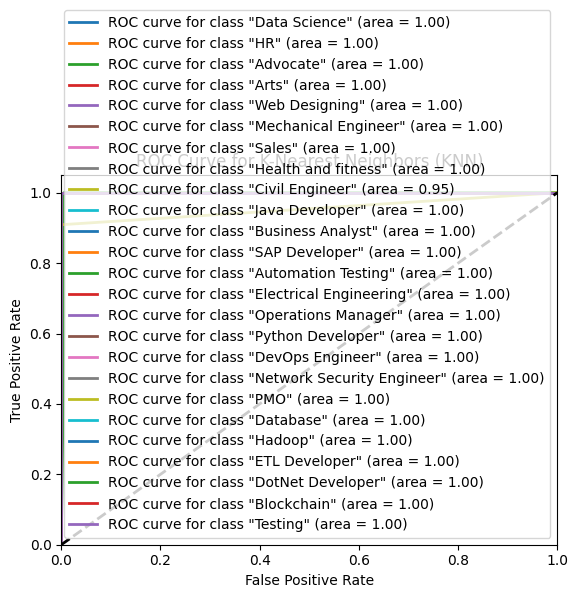

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# Train the KNN model
knn_model = KNeighborsClassifier()
knn_classifier = OneVsRestClassifier(knn_model)
knn_classifier.fit(X_train, y_train)

# Predict probabilities for the test set
knn_y_pred_prob = knn_classifier.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, label in enumerate(tLabels):
    label_indices = (y_test == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(label_indices, knn_y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for KNN
plt.figure()
for i, label in enumerate(tLabels):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class "{label}" (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors (KNN)')
plt.legend(loc="lower right")
plt.show()



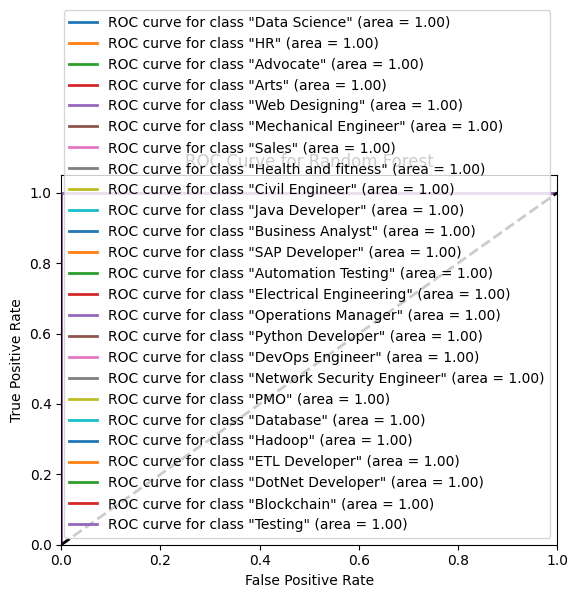

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_classifier = OneVsRestClassifier(rf_model)
rf_classifier.fit(X_train, y_train)

# Predict probabilities for the test set
rf_y_pred_prob = rf_classifier.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, label in enumerate(tLabels):
    label_indices = (y_test == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(label_indices, rf_y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for Random Forest
plt.figure()
for i, label in enumerate(tLabels):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class "{label}" (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


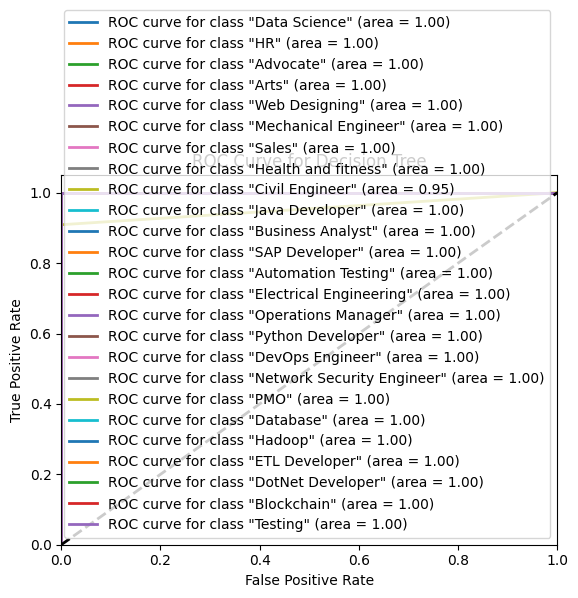

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_classifier = OneVsRestClassifier(dt_model)
dt_classifier.fit(X_train, y_train)

# Predict probabilities for the test set
dt_y_pred_prob = dt_classifier.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, label in enumerate(tLabels):
    label_indices = (y_test == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(label_indices, dt_y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for Decision Tree
plt.figure()
for i, label in enumerate(tLabels):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class "{label}" (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()
